In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data  = pd.read_csv('churn_data.csv')
data.sample(10)

# target variable is (churn):
#The customers leaving the current company and moving to another telecom company are called --->  (churn)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1088,7029-RPUAV,Male,1,Yes,No,17,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.45,1622.45,Yes
4962,7088-FBAWU,Female,0,Yes,Yes,17,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,74.55,1215.8,No
614,7138-GIRSH,Male,0,No,No,50,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),69.50,3418.2,No
602,1096-ADRUX,Female,0,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,No,No,No,No,One year,Yes,Bank transfer (automatic),74.25,4859.25,No
5661,4396-KLSEH,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.85,63,No
1421,5357-TZHPP,Male,1,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),84.40,732.5,Yes
6151,3627-FCRDW,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,71.00,672.55,Yes
4451,1608-GMEWB,Male,1,No,No,45,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.90,4200.25,No
1900,0754-EEBDC,Male,0,Yes,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,76.65,No
6569,2229-DPMBI,Female,0,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.50,162.15,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.TotalCharges.dtype

dtype('O')

In [5]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

##  pandas to numeric function .
# If ‘raise’, then invalid parsing will raise an exception.

# If ‘coerce’, then invalid parsing will be set as NaN.

# If ‘ignore’, then invalid parsing will return the input.

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
data.dropna(axis = 0 , inplace = True)

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [57]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [61]:
data['gender'].map({'Female':0, 'Male':1})

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7032, dtype: int64

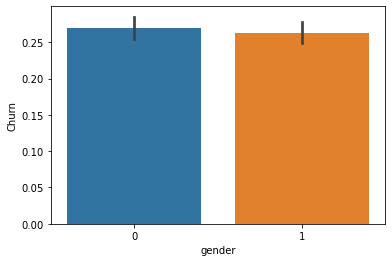

In [65]:
sns.barplot(x = data['gender'].map({'Female':0, 'Male':1}) 
                
            ,y = data['Churn'].map({'No':0, 'Yes':1}) , data = data)

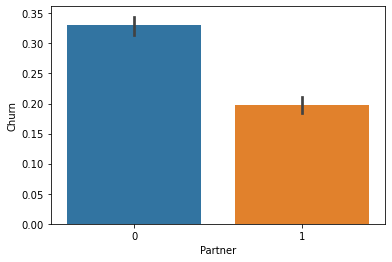

In [74]:
sns.barplot(x = data['Partner'].map({'No':0, 'Yes':1}) 
                
            ,y = data['Churn'].map({'No':0, 'Yes':1}) , data = data)

In [75]:
data.iloc[:1,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [76]:
data.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

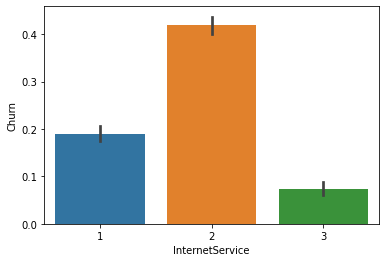

In [77]:
sns.barplot(x = data['InternetService'].map({'DSL':1, 'Fiber optic':2 , 'No':3}) 
                
            ,y = data['Churn'].map({'No':0, 'Yes':1}) , data = data)

In [73]:
data.Churn.value_counts()/len(data.Churn)*100  

# i can clearly see that there is class imbalance 

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [78]:
data.describe() # summary

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [79]:
data['Churn'].value_counts() # there is a class imabalance in the data .

No     5163
Yes    1869
Name: Churn, dtype: int64

In [80]:
# data.quantile([.1, .25, .5, .75 , 1], axis = 0)

In [81]:
# data[['SeniorCitizen' ,'tenure','MonthlyCharges' ]]

In [82]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [83]:
data.drop('customerID' , axis = 1 , inplace = True)

In [84]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [85]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [86]:
data  = pd.get_dummies(data , columns= ['gender' , 'Partner', 'Dependents','PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'] , drop_first = True)

In [87]:
data.iloc[:5,:]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,No,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,Yes,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


### assigining value for target column

In [88]:
data['Churn']  = data['Churn'].apply(lambda x : 0 if x =='No' else 1)

In [89]:
data.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

feature: SeniorCitizen


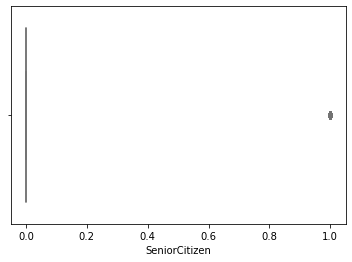

feature: tenure


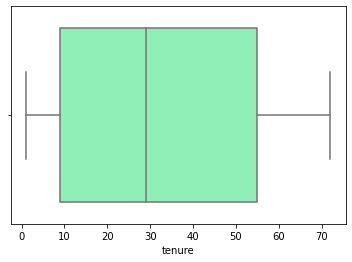

feature: MonthlyCharges


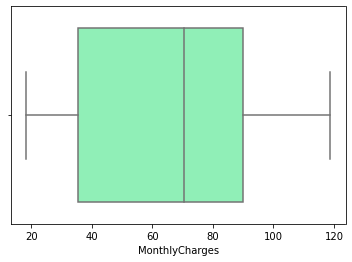

feature: TotalCharges


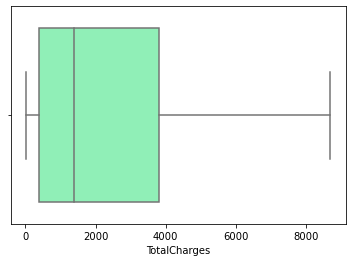

feature: Churn


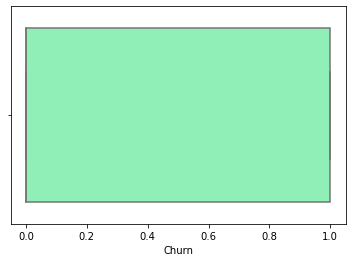

feature: gender_Male


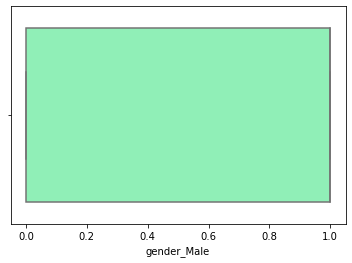

feature: Partner_Yes


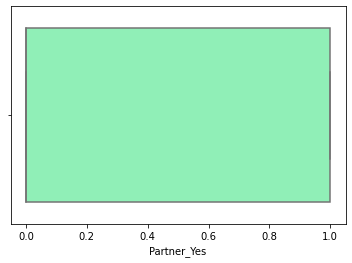

feature: Dependents_Yes


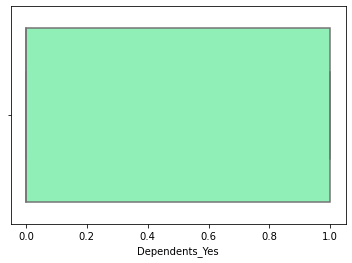

feature: PhoneService_Yes


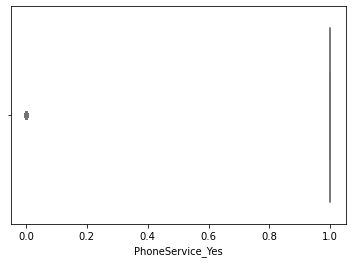

feature: MultipleLines_No phone service


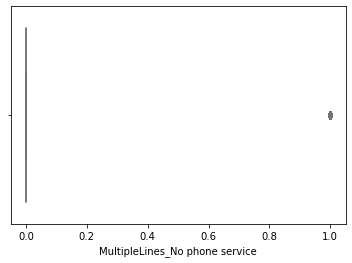

feature: MultipleLines_Yes


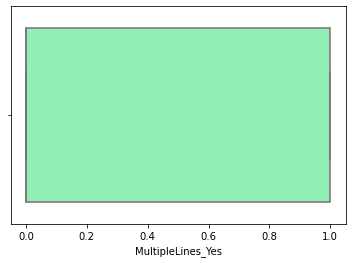

feature: InternetService_Fiber optic


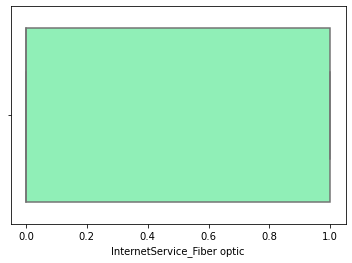

feature: InternetService_No


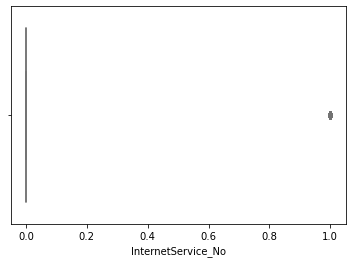

feature: OnlineSecurity_No internet service


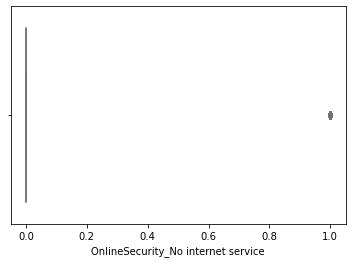

feature: OnlineSecurity_Yes


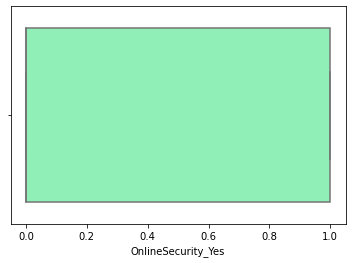

feature: OnlineBackup_No internet service


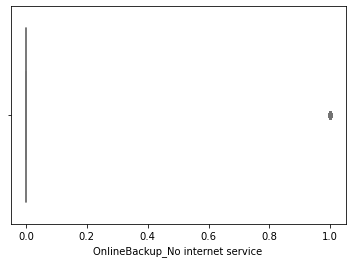

feature: OnlineBackup_Yes


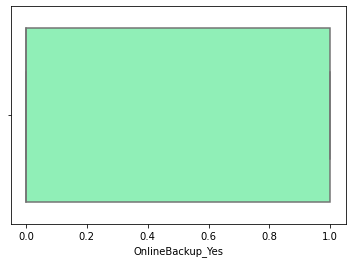

feature: DeviceProtection_No internet service


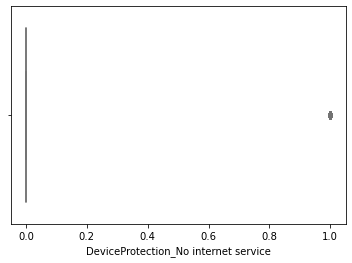

feature: DeviceProtection_Yes


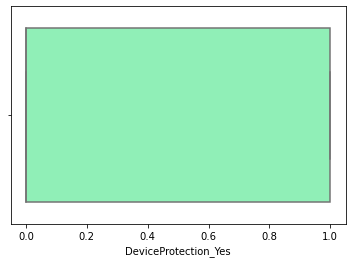

feature: TechSupport_No internet service


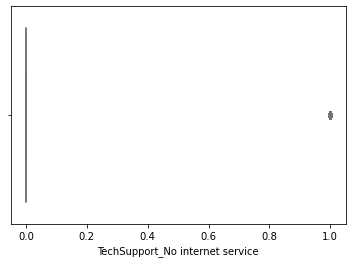

feature: TechSupport_Yes


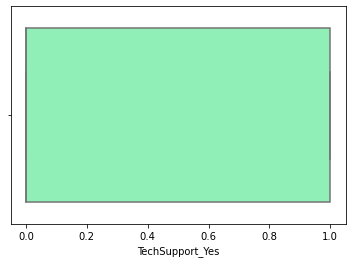

feature: StreamingTV_No internet service


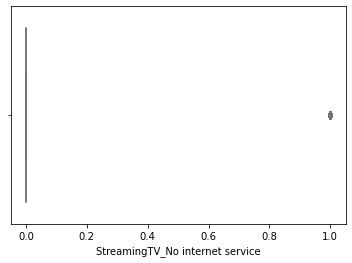

feature: StreamingTV_Yes


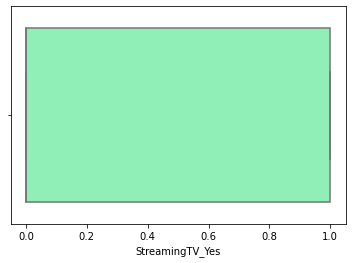

feature: StreamingMovies_No internet service


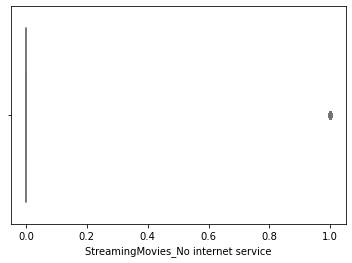

feature: StreamingMovies_Yes


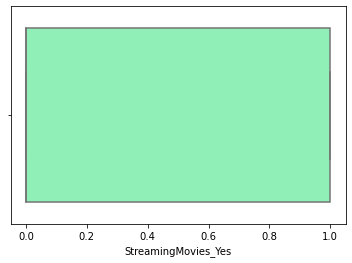

feature: Contract_One year


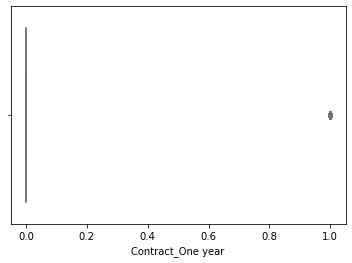

feature: Contract_Two year


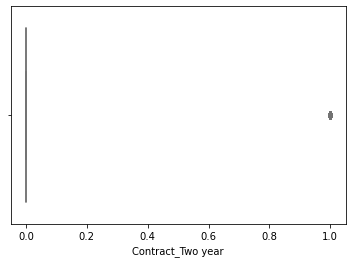

feature: PaperlessBilling_Yes


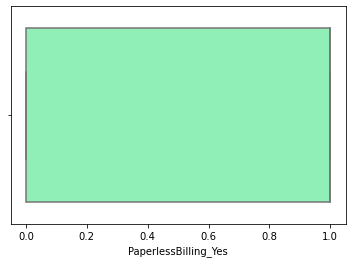

feature: PaymentMethod_Credit card (automatic)


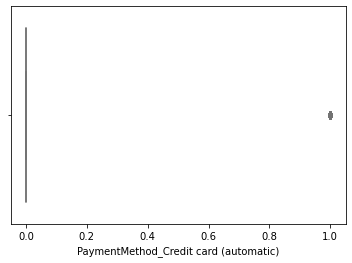

feature: PaymentMethod_Electronic check


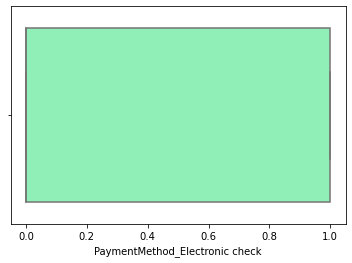

feature: PaymentMethod_Mailed check


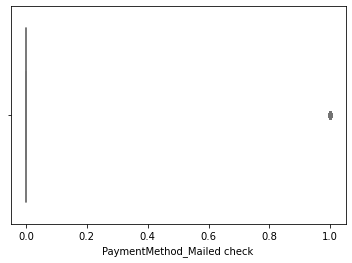

In [90]:
for i in data.columns:
    sns.boxplot(x = data[i] , data = data , palette = 'rainbow')
    print('feature:',i)
    
    plt.show()
    
    
    
# NO OUTLIERS 

In [91]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

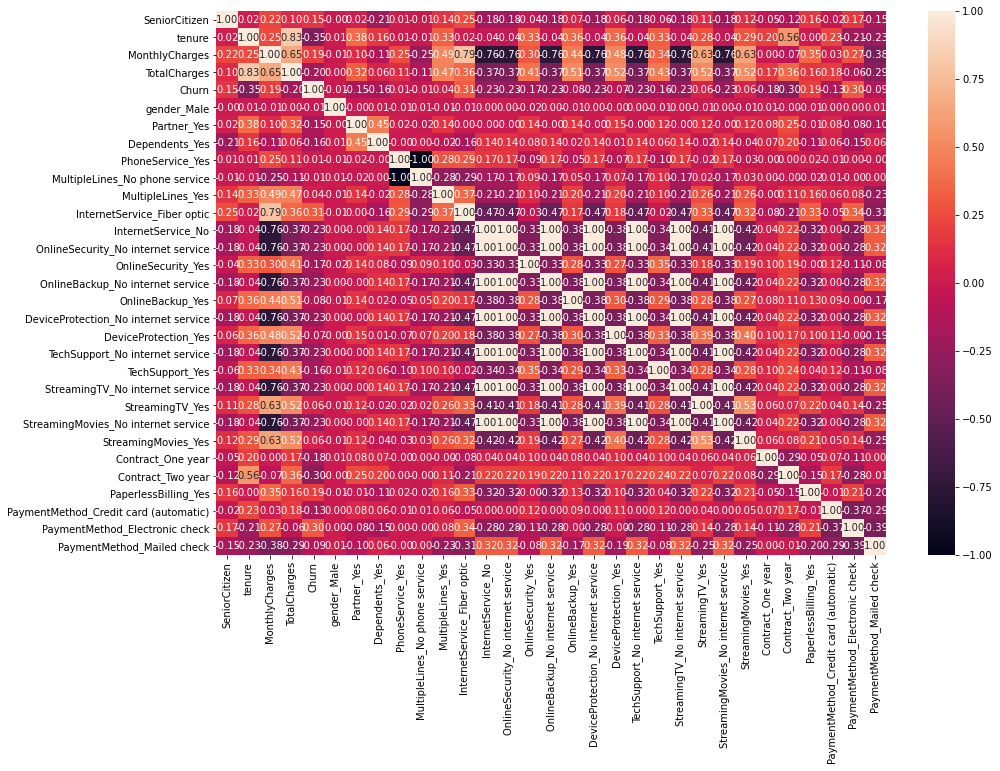

In [92]:
fig = plt.figure(figsize = (15,10))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f',  cmap="rocket")

# figsize(width , height)
# annot : If True, write the data value in each cell
# fmt : String formatting code to use when adding annotations.
# cmap : matplotlib colormap name or object, or list of colors

In [93]:
from sklearn.model_selection import train_test_split

# import train_test_split() in order to do splitting data.

In [94]:
x = data.drop('Churn', axis = 1) # set the features for the respective target
y = data.Churn                  # target 

In [95]:
x_train ,x_test ,y_train ,y_test = train_test_split (x,y , test_size = 0.25, random_state = 4)

# test_size parameter split the whole data into X train and X test
# random_state is used to freeze this spliting, it can be any numerical value

In [96]:
display('TRAINING_DATA',x_train.head(),y_train.head(),'TESTING_DATA',x_test.head(),y_test.head())

# displaying heading rows of both data

'TRAINING_DATA'

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1397,0,4,82.85,319.60,0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
5127,0,67,118.35,7804.15,1,0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,0
4014,1,52,108.10,5839.30,0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
2071,0,67,94.10,6302.80,0,1,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
726,0,22,26.25,605.90,0,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1


1397    0
5127    1
4014    0
2071    0
726     0
Name: Churn, dtype: int64

'TESTING_DATA'

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6036,0,53,110.50,5835.50,0,1,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0
1204,0,18,25.55,467.85,1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5717,1,69,56.55,3952.65,1,1,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
1739,0,1,69.90,69.90,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4981,0,14,50.75,712.75,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0


6036    0
1204    0
5717    0
1739    1
4981    1
Name: Churn, dtype: int64

In [97]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler 

sc = StandardScaler()

min_max = MinMaxScaler()

In [98]:
data.iloc[:,[1,2,3]]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [99]:
x_train_scaled = min_max.fit_transform(x_train.iloc[:,[1,2,3]])

x_test_scaled = min_max.fit_transform(x_test.iloc[:,[1,2,3]]) 

In [100]:
x_train_scaled

array([[0.04225352, 0.64278607, 0.03470479],
       [0.92957746, 0.9960199 , 0.89837814],
       [0.71830986, 0.89402985, 0.67164592],
       ...,
       [0.16901408, 0.360199  , 0.07939118],
       [0.43661972, 0.02288557, 0.07335607],
       [0.56338028, 0.2199005 , 0.19143891]])

In [101]:
from sklearn.tree  import DecisionTreeClassifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
clf_dt = DecisionTreeClassifier()

In [104]:
clf_dt.fit(x_train_scaled  , y_train)

DecisionTreeClassifier()

In [105]:
dt_predicted  = clf_dt.predict(x_test_scaled)
dt_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [106]:
print(classification_report(y_test, dt_predicted))
print("The dt model accuracy on Test data is %s:", accuracy_score(y_test, dt_predicted)*100)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1263
           1       0.50      0.50      0.50       495

    accuracy                           0.72      1758
   macro avg       0.65      0.65      0.65      1758
weighted avg       0.72      0.72      0.72      1758

The RF model accuracy on Test data is %s: 72.07053469852104


In [107]:
clf = RandomForestClassifier()

In [108]:
clf.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [110]:
rf_predicted  = clf.predict(x_test_scaled)
rf_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

In [112]:
print(classification_report(y_test, rf_predicted))
print("The RF model accuracy on Test data is %s:", accuracy_score(y_test, rf_predicted)*100)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1263
           1       0.62      0.45      0.52       495

    accuracy                           0.77      1758
   macro avg       0.71      0.67      0.69      1758
weighted avg       0.75      0.77      0.76      1758

The RF model accuracy on Test data is %s: 76.84869169510807


In [113]:
from sklearn.metrics import confusion_matrix as cm

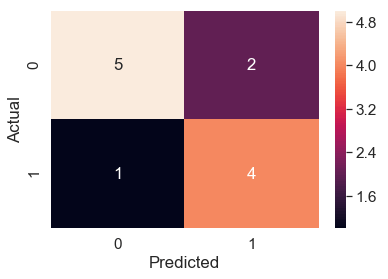

###  Confusion Matrix

In [114]:
cm1 = cm(y_test,dt_predicted)
cm1

array([[1019,  244],
       [ 247,  248]], dtype=int64)

In [115]:
y_test.value_counts()

0    1263
1     495
Name: Churn, dtype: int64

###  Sensitivity & Specificity

In [116]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.8068091844813935
Specificity :  0.501010101010101


In [117]:
df  = pd.DataFrame({'y_actual':y_test , 'y_predicted':dt_predicted})
df

,y_actual,y_predicted
6036,0,0
1204,0,0
5717,0,0
1739,1,0
4981,1,0
...,...,...
6989,0,0
3976,1,1
1911,0,0
6819,1,1


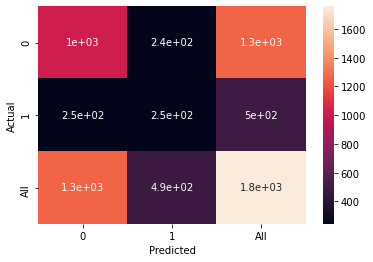

In [118]:
cm = pd.crosstab(df['y_actual'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sns.heatmap(cm, annot=True)
plt.show()